## Leading Causes of Death Around the World

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import json
import scipy.stats as st
from pprint import pprint
import gmaps
from config import gkey

In [3]:
gmaps.configure(api_key=gkey)

In [4]:
# Pull in csv files 
annual_num_deaths_csv = ("../Resources/annual-number-of-deaths-by-cause.csv")
mortality_df = pd.read_csv(annual_num_deaths_csv)
mortality_df = mortality_df.dropna(how='all')

# Second csv for later use
socio_csv = ("../Resources/soci_econ_country_profiles.csv")
socio_df = pd.read_csv(socio_csv)
# socio_df.head()

Deaths - Neoplasms - Sex: Both - Age: All Ages (Number)

In [5]:
# Renaming columns
# Create list of existing columns
column_list = mortality_df.columns

# New column names
new_mort_list = []

for columns in range(len(column_list)):
    new = column_list[columns].replace("Deaths - ","")
    new_two = new.replace(" - Sex: Both - Age: All Ages (Number)", "")
    new_mort_list.append(new_two)

In [6]:
mortality_df.columns = new_mort_list
mortality_df = mortality_df.rename(columns={'Entity':'Country'})
# print(mortality_df['Country'].unique())

In [7]:
# Filter by Years (2014 to 2018)
year = mortality_df['Year']
year = year.astype(int)
year_df = pd.DataFrame(mortality_df.loc[(year >= 2014) & (year <= 2018)])

# Calculating total mortality rate
mort = year_df.iloc[:,3:36]
total_deaths = mort.sum(axis=1)
# Adding column with total mortality rate, per year
year_df['Total Number of Deaths'] = total_deaths
year_df.head()

,Country,Code,Year,Number of executions (Amnesty International),Meningitis,Neoplasms,"Fire, heat, and hot substances",Malaria,Drowning,Interpersonal violence,...,Terrorism (deaths),Cardiovascular diseases,Chronic kidney disease,Chronic respiratory diseases,Cirrhosis and other chronic liver diseases,Digestive diseases,Acute hepatitis,Alzheimer's disease and other dementias,Parkinson's disease,Total Number of Deaths
6,Afghanistan,AFG,2014,6,1935.0,18462.0,463.0,228.0,1757.0,4420.0,...,5414.0,55932.0,5055.0,6851.0,3454.0,6522.0,2134.0,1620.0,502.0,211369.0
7,Afghanistan,AFG,2015,1,1821.0,18876.0,463.0,284.0,1730.0,5039.0,...,6216.0,56875.0,5153.0,6835.0,3492.0,6555.0,2065.0,1652.0,511.0,217939.0
8,Afghanistan,AFG,2016,6,1795.0,19459.0,471.0,388.0,1742.0,5033.0,...,6142.0,57970.0,5296.0,6894.0,3578.0,6673.0,2044.0,1690.0,524.0,223712.0
27,Afghanistan,AFG,2017,NaN,1665.0,20111.0,476.0,399.0,1723.0,5191.0,...,6092.0,59553.0,5419.0,6982.0,3693.0,6841.0,2046.0,1728.0,537.0,217207.0
28,Afghanistan,AFG,2018,NaN,1576.0,20673.0,475.0,466.0,1669.0,5500.0,...,NaN,60893.0,5531.0,7036.0,3732.0,6861.0,1972.0,1757.0,551.0,219391.0


In [8]:
# year_df.sort_values('Total Number of Deaths', ascending=False, inplace=False)

# code.isnull().values

drop = ['OWID_WRL','OWID_KOS']
code = year_df.loc[year_df["Code"].notnull()]

code = code.set_index('Code')
code = code.drop(drop)
code = code.reset_index(drop=False)

# code.sort_values('Total Number of Deaths', ascending=False, inplace=False)

In [9]:
# Cleaning new DataFrame, prepping for merge
socio2_df = socio_df[['country','Life expectancy at birth, total (years)','GDP per capita (current US$)','Health: Total expenditure (% of GDP)','Health: Physicians (per 1000 pop.)','Health Care Index','Population, female','Population, male']]
socio2_df = socio2_df.rename(columns={
    'Life expectancy at birth, total (years)':'Life Expectancy at birth',
    'GDP per capita (current US$)':'GDP per capita ($)',
    'Health: Total expenditure (% of GDP)':'Total expenditure (% GDP)',
    'Health: Physicians (per 1000 pop.)':'Physicians (per 1000)',
})
socio2_df

,country,Life Expectancy at birth,GDP per capita ($),Total expenditure (% GDP),Physicians (per 1000),Health Care Index,"Population, female","Population, male"
0,Argentina,76.372000,14564.5,4.8,3.8,73.30,22572521.0,21472290.0
1,Australia,82.500000,51352.2,9.4,3.4,74.25,12349632.0,12252228.0
2,Austria,81.643902,44117.7,11.2,5.2,80.91,4478340.0,4319226.0
3,Belarus,74.129268,5750.8,5.7,4.1,53.76,5077542.0,4420722.0
4,Belgium,81.492683,40277.8,10.6,3.0,78.92,5766141.0,5609017.0
...,...,...,...,...,...,...,...,...
61,United Arab Emirates,77.647000,40438.8,3.6,1.6,60.49,2891723.0,6595480.0
62,United Kingdom,81.256098,44162.4,9.1,2.8,74.28,33464674.0,32594185.0
63,United States of America,78.539024,56053.8,17.1,2.6,68.22,164193686.0,160791853.0
64,Venezuela (Bolivarian Republic of),72.246000,11068.9,5.3,...,36.90,14843348.0,14547061.0


In [11]:
# Merging 
new_df = code.merge(socio2_df, how='inner', left_on='Country', right_on='country')
new_df = new_df.drop('country', 1)

# # New Population column by combining male and female population
new_df['Population'] = new_df['Population, female'] + new_df['Population, male']
pop = new_df['Population']
# # Drop male, female population columns, executions, terrorism
new_df = new_df.drop(['Population, female','Population, male','Number of executions (Amnesty International)','Terrorism (deaths)'],1)

total_death_rate = (new_df['Total Number of Deaths'] / pop)*100
new_df['Total Death Rate'] = total_death_rate

clean_columns = ['Country','Code','Year','Neoplasms','Lower respiratory infections','Cardiovascular diseases',
                 'Chronic respiratory diseases','Total Number of Deaths','Life Expectancy at birth', 'GDP per capita ($)',
                 'Total expenditure (% GDP)', 'Physicians (per 1000)','Health Care Index', 'Population', 'Total Death Rate']

clean_df = new_df[clean_columns]

# pd.to_numeric(clean_df['Physicians (per 1000)'])
clean_df

,Country,Code,Year,Neoplasms,Lower respiratory infections,Cardiovascular diseases,Chronic respiratory diseases,Total Number of Deaths,Life Expectancy at birth,GDP per capita ($),Total expenditure (% GDP),Physicians (per 1000),Health Care Index,Population,Total Death Rate
0,Argentina,ARG,2014,76832.0,34668.0,93640.0,17789.0,312071.0,76.372,14564.5,4.8,3.8,73.30,44044811.0,0.708531
1,Argentina,ARG,2015,78388.0,36109.0,95955.0,18280.0,319105.0,76.372,14564.5,4.8,3.8,73.30,44044811.0,0.724501
2,Argentina,ARG,2016,81304.0,38173.0,100391.0,19026.0,332157.0,76.372,14564.5,4.8,3.8,73.30,44044811.0,0.754134
3,Argentina,ARG,2017,83141.0,37601.0,101975.0,19334.0,336212.0,76.372,14564.5,4.8,3.8,73.30,44044811.0,0.763341
4,Argentina,ARG,2018,83676.0,36482.0,100742.0,19145.0,333808.0,76.372,14564.5,4.8,3.8,73.30,44044811.0,0.757883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,Vietnam,VNM,2014,95150.0,21646.0,222872.0,33943.0,568837.0,75.241,2067.9,7.1,1.2,47.87,94596642.0,0.601329
291,Vietnam,VNM,2015,98218.0,21572.0,225569.0,34289.0,577667.0,75.241,2067.9,7.1,1.2,47.87,94596642.0,0.610663
292,Vietnam,VNM,2016,101684.0,21492.0,228957.0,34806.0,588196.0,75.241,2067.9,7.1,1.2,47.87,94596642.0,0.621794
293,Vietnam,VNM,2017,105181.0,21460.0,232646.0,35312.0,598804.0,75.241,2067.9,7.1,1.2,47.87,94596642.0,0.633008


In [26]:
grouped_df = clean_df.groupby('Country').mean()
grouped_df = grouped_df.drop(columns='Year')
grouped_df = grouped_df.reset_index()
grouped_df = grouped_df.sort_values(by='Total Death Rate', axis=0, ascending=False)
grouped_df.head()

,Country,Neoplasms,Lower respiratory infections,Cardiovascular diseases,Chronic respiratory diseases,Total Number of Deaths,Life Expectancy at birth,GDP per capita ($),Total expenditure (% GDP),Health Care Index,Population,Total Death Rate
7,Bulgaria,22500.6,1948.4,77220.8,2948.4,123111.8,74.814634,6846.8,8.4,54.03,7075947.0,1.739863
44,Serbia,28232.2,1560.0,62260.6,3899.4,114872.0,75.539024,5238.6,10.4,53.86,7020858.0,1.636153
55,Ukraine,96174.0,8596.0,437113.0,11182.0,688573.0,71.780976,2021.6,7.1,49.81,44831135.0,1.535926
31,Lithuania,8193.4,562.4,21666.0,798.6,39267.0,75.480488,14383.7,6.6,68.74,2828403.0,1.388310
42,Romania,52153.0,6329.2,145015.8,7797.2,261045.6,75.309756,9120.7,5.6,53.11,19587290.0,1.332730


In [57]:
grouped_df.sort_values(by='Life Expectancy at birth', axis=0, ascending=False).head()

,Country,Neoplasms,Lower respiratory infections,Cardiovascular diseases,Chronic respiratory diseases,Total Number of Deaths,Life Expectancy at birth,GDP per capita ($),Total expenditure (% GDP),Health Care Index,Population,Total Death Rate,GDP spent on Health ($ per person)
28,Japan,425202.8,108517.2,344429.6,51695.6,1287346.4,84.099756,34628.7,10.2,78.63,126785797.0,1.015371,3532.1274
52,Switzerland,19508.8,1808.4,22832.4,2942.2,63023.6,83.551220,80831.1,11.7,71.04,8451840.0,0.745679,9457.2387
49,Spain,122010.2,13194.2,123812.0,34620.2,393836.4,83.282927,25865.4,9.0,76.65,46593236.0,0.845265,2327.8860
45,Singapore,6261.8,3057.0,6133.2,646.8,20021.0,83.095122,52239.0,4.9,69.87,5612253.0,0.356737,2559.7110
27,Italy,186227.4,11651.0,221825.6,29544.4,594169.6,82.946341,30462.4,9.2,66.31,60536709.0,0.981503,2802.5408


In [58]:
grouped_df.sort_values(by='Total expenditure (% GDP)', axis=0, ascending=False).head()

,Country,Neoplasms,Lower respiratory infections,Cardiovascular diseases,Chronic respiratory diseases,Total Number of Deaths,Life Expectancy at birth,GDP per capita ($),Total expenditure (% GDP),Health Care Index,Population,Total Death Rate,GDP spent on Health ($ per person)
51,Sweden,25473.8,2762.2,35466.8,4369.6,87392.0,82.409756,50687.5,11.9,70.64,10057698.0,0.868907,6031.8125
52,Switzerland,19508.8,1808.4,22832.4,2942.2,63023.6,83.551220,80831.1,11.7,71.04,8451840.0,0.745679,9457.2387
19,France,189169.0,20769.4,153950.8,20565.4,532685.2,82.575610,36304.2,11.5,78.62,66864379.0,0.796665,4174.9830
20,Germany,262365.8,23695.6,346639.0,43651.4,890261.4,80.992683,41686.2,11.3,76.74,82657002.0,1.077055,4710.5406
2,Austria,21900.4,1092.2,32051.4,3304.0,77772.6,81.643902,44117.7,11.2,80.91,8797566.0,0.884024,4941.1824


In [111]:
life_expect = grouped_df['Life Expectancy at birth']
spend = grouped_df["Total expenditure (% GDP)"]
hci = grouped_df["Health Care Index"]
tdr = grouped_df['Total Death Rate']

#Calculate spending per person
grouped_df['GDP spent on Health ($ per person)'] = grouped_df['GDP per capita ($)'] * (grouped_df['Total expenditure (% GDP)']/100)
spend_per_person = grouped_df['GDP spent on Health ($ per person)']
# grouped_df.sort_values(by='GDP spent on Health ($ per person)', axis=0, ascending=False)


In [61]:
plt.rcParams['figure.facecolor'] = 'aliceblue'

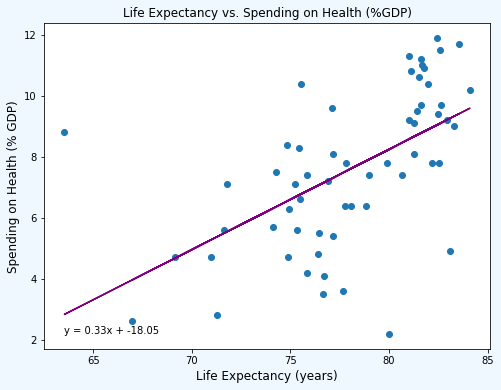

In [70]:
# Spending on Health vs Life Expectancy
x=life_expect
y=spend

xmin=x.min()
ymin=y.min()
plt.figure(figsize=(8,6))
plt.scatter(x, y)
plt.title('Life Expectancy vs. Spending on Health (%GDP)')
plt.ylabel('Spending on Health (% GDP)', fontsize=12)
plt.xlabel('Life Expectancy (years)', fontsize=12)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = np.array(x) * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x,regress_values,c="purple")
plt.annotate(line, (xmin, ymin))

plt.savefig('Output/life_expectancy_vs_health_spending.png')
plt.show()

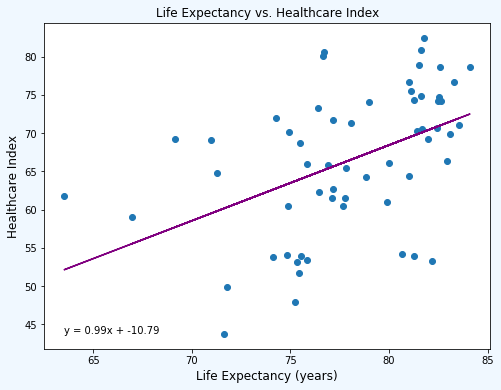

In [71]:
# Life Expectancy vs. Healthcare Index
x=life_expect
y=hci

xmin=x.min()
ymin=y.min()
plt.figure(figsize=(8,6))
plt.scatter(x, y)

plt.title('Life Expectancy vs. Healthcare Index')
plt.ylabel('Healthcare Index', fontsize=12)
plt.xlabel('Life Expectancy (years)', fontsize=12)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = np.array(x) * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x,regress_values,c="purple")
plt.annotate(line, (xmin, ymin))

plt.savefig('Output/life_expectancy_vs_hci.png')
plt.show()

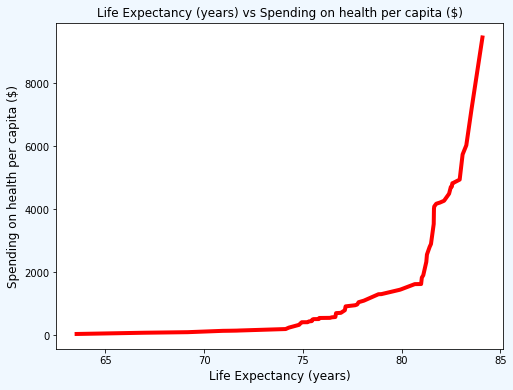

In [72]:
# Life Expectancy (years) vs Spending on health per capita ($)
plt.figure(figsize=(8,6))
plt.plot(life_expect.sort_values(axis=0, ascending=False), spend_per_person.sort_values(axis=0, ascending=False), color='r', linewidth=4)
plt.xlabel('Life Expectancy (years)', fontsize=12)
plt.ylabel('Spending on health per capita ($)', fontsize=12)
plt.title('Life Expectancy (years) vs Spending on health per capita ($)')
plt.savefig('Output/life_expectancy_vs_spendpercap')

In [73]:
# Countries with highest and lowest death rates
grouped_df.sort_values(by=['Total Death Rate'], inplace=True, ascending=False)
death_rate_sort = grouped_df['Country'].unique()
most_deaths = death_rate_sort[0:10]
least_deaths = death_rate_sort[-11:-1]
print(most_deaths)
print(least_deaths)

['Bulgaria' 'Serbia' 'Ukraine' 'Lithuania' 'Romania' 'Hungary' 'Belarus'
 'Croatia' 'Estonia' 'Bosnia and Herzegovina']
['Mexico' 'Turkey' 'Israel' 'Malaysia' 'Lebanon' 'Colombia' 'Singapore'
 'Saudi Arabia' 'Jordan' 'United Arab Emirates']


In [74]:
# Filtering by countries with highest death rates per capita
# .mean() averages between years 2014-2018
most_deaths_df = grouped_df[grouped_df["Country"].isin(most_deaths)]
md = most_deaths_df.groupby('Country').mean().sort_values(by='Total Death Rate')

# Convert cause of death values to per capita values (per 1000)
md_pop = md['Population']
# Isolate desired values to calculate
cause_md = md.iloc[:,0:4]
# Divide values, then place back into df
k = cause_md.div(md_pop, axis = 0)*1000
md.iloc[:,0:4] = k
md

,Neoplasms,Lower respiratory infections,Cardiovascular diseases,Chronic respiratory diseases,Total Number of Deaths,Life Expectancy at birth,GDP per capita ($),Total expenditure (% GDP),Health Care Index,Population,Total Death Rate,GDP spent on Health ($ per person)
Country,,,,,,,,,,,,
Bosnia and Herzegovina,2.777719,0.118931,5.468731,0.362342,36488.8,77.128000,4265.0,9.6,61.49,3351527.0,1.088722,409.4400
Estonia,2.914868,0.170489,5.935247,0.228483,15303.8,78.092683,17112.0,6.4,71.30,1317384.0,1.161681,1095.1680
Croatia,3.438355,0.125202,5.804587,0.449312,50142.0,77.826829,11479.4,7.8,65.49,4124531.0,1.215702,895.3932
Belarus,2.014158,0.120338,8.000241,0.237854,120986.6,74.129268,5750.8,5.7,53.76,9498264.0,1.273776,327.7956
Hungary,3.508165,0.120536,6.256683,0.614469,127318.0,75.817073,12350.6,7.4,53.46,9787966.0,1.300761,913.9444
Romania,2.662594,0.323128,7.403566,0.398074,261045.6,75.309756,9120.7,5.6,53.11,19587290.0,1.332730,510.7592
Lithuania,2.896829,0.198840,7.660153,0.282350,39267.0,75.480488,14383.7,6.6,68.74,2828403.0,1.388310,949.3242
Ukraine,2.145250,0.191742,9.750210,0.249425,688573.0,71.780976,2021.6,7.1,49.81,44831135.0,1.535926,143.5336
Serbia,4.021189,0.222195,8.867947,0.555402,114872.0,75.539024,5238.6,10.4,53.86,7020858.0,1.636153,544.8144


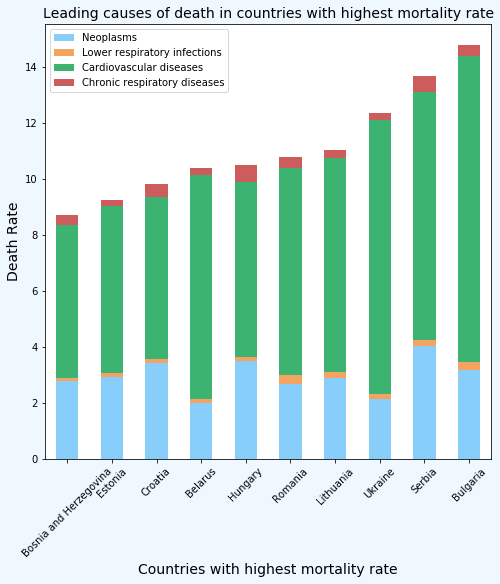

In [75]:
colors = ['lightskyblue', 'sandybrown', 'mediumseagreen', 'indianred']
k.loc[md.sum(axis=1).index].plot.bar(stacked=True, figsize=(8,8), color=colors)
plt.title('Leading causes of death in countries with highest mortality rate', fontsize=14)
plt.ylabel('Death Rate', fontsize=14)
plt.xlabel('Countries with highest mortality rate', fontsize=14)
plt.xticks(rotation = 45)
plt.savefig('Output/leading_cause_death_in_deadliest_countries.png')

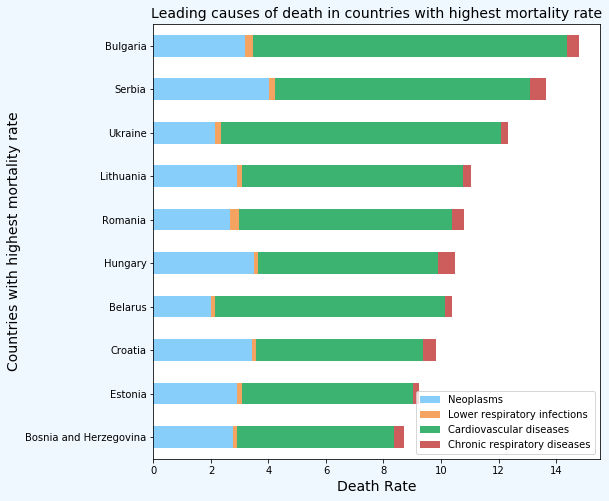

In [76]:
k.plot.barh(stacked=True,figsize=(8,8),color=colors)
plt.title('Leading causes of death in countries with highest mortality rate', fontsize=14)
plt.xlabel('Death Rate', fontsize=14)
plt.ylabel('Countries with highest mortality rate', fontsize=14)
plt.legend(loc='lower right')
plt.savefig('Output/leading_cause_death_in_deadliest_countries_horizontal.png')

In [77]:
# Filtering by countries with lowest death rates per capita
least_deaths_df = grouped_df[grouped_df["Country"].isin(least_deaths)]
ld = least_deaths_df.groupby('Country').mean().sort_values(by='Total Death Rate')

# Convert cause of death values to per capita values (per 1000)
ld_pop = ld['Population']

# Isolate desired values to calculate
cause_ld = ld.iloc[:,0:4]

# Divide values, then place back into df
j = cause_ld.div(ld_pop, axis = 0)*1000
ld.iloc[:,0:4] = j
ld = ld.sort_values(by='Total Death Rate', ascending=True)
ld

,Neoplasms,Lower respiratory infections,Cardiovascular diseases,Chronic respiratory diseases,Total Number of Deaths,Life Expectancy at birth,GDP per capita ($),Total expenditure (% GDP),Health Care Index,Population,Total Death Rate,GDP spent on Health ($ per person)
Country,,,,,,,,,,,,
United Arab Emirates,0.446897,0.051501,0.710114,0.156527,22383.6,77.647000,40438.8,3.6,60.49,9487203.0,0.235935,1455.7968
Jordan,0.468506,0.095427,0.960061,0.070108,24951.8,74.292000,4940.1,7.5,71.92,9779173.0,0.255152,370.5075
Saudi Arabia,0.343743,0.133943,1.266903,0.105785,108568.4,74.874000,20710.6,4.7,60.41,33099147.0,0.328010,973.3982
Singapore,1.115737,0.544701,1.092823,0.115248,20021.0,83.095122,52239.0,4.9,69.87,5612253.0,0.356737,2559.7110
Colombia,0.921460,0.152520,1.336261,0.323531,216979.8,76.925000,6056.1,7.2,65.79,48901066.0,0.443712,436.0392
Lebanon,1.047495,0.131858,2.322063,0.170085,32304.0,78.833000,8571.4,6.4,64.28,6811873.0,0.474231,548.5696
Malaysia,0.870708,0.638591,1.635375,0.200000,147937.0,75.828000,9768.4,4.2,65.99,31105028.0,0.475605,410.2728
Israel,1.546486,0.187093,1.298268,0.214132,41625.8,82.551220,37129.4,7.8,74.78,8713300.0,0.477727,2896.0932
Turkey,1.215520,0.169920,2.099268,0.401586,422662.4,77.161000,9125.8,5.4,71.68,81101892.0,0.521150,492.7932


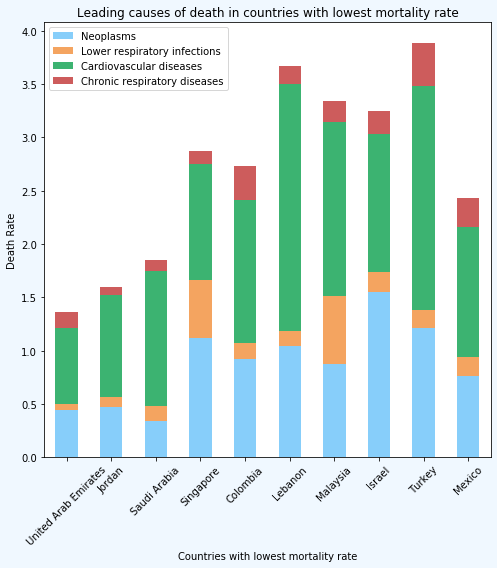

In [78]:
colors = ['lightskyblue', 'sandybrown', 'mediumseagreen', 'indianred']
j.loc[ld.sum(axis=1).index].plot.bar(stacked=True, figsize=(8,8), color=colors)
plt.title('Leading causes of death in countries with lowest mortality rate')
plt.ylabel('Death Rate')
plt.xlabel('Countries with lowest mortality rate')
plt.xticks(rotation = 45)
plt.savefig('Output/leading_cause_death_in_least_deadly_countries.png')

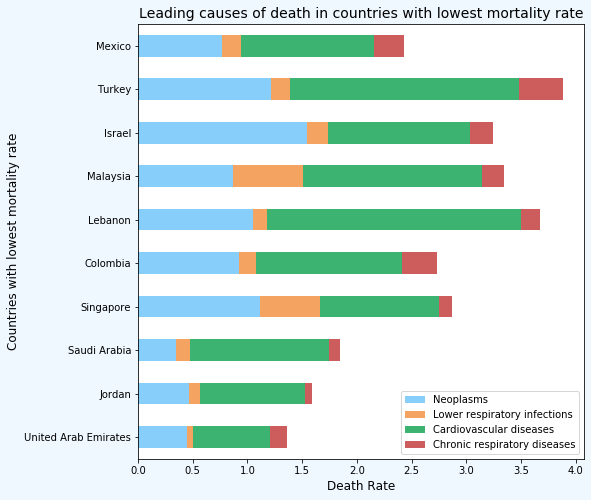

In [79]:
j.plot.barh(stacked=True, figsize=(8,8), color=colors)
plt.title('Leading causes of death in countries with lowest mortality rate', fontsize=14)
plt.xlabel('Death Rate', fontsize=12)
plt.ylabel('Countries with lowest mortality rate', fontsize=12)
plt.legend(loc='lower right')
plt.savefig('Output/leading_cause_death_in_least_deadly_countries_horizontal.png')

In [80]:
grouped_df.head()

,Country,Neoplasms,Lower respiratory infections,Cardiovascular diseases,Chronic respiratory diseases,Total Number of Deaths,Life Expectancy at birth,GDP per capita ($),Total expenditure (% GDP),Health Care Index,Population,Total Death Rate,GDP spent on Health ($ per person)
7,Bulgaria,22500.6,1948.4,77220.8,2948.4,123111.8,74.814634,6846.8,8.4,54.03,7075947.0,1.739863,575.1312
44,Serbia,28232.2,1560.0,62260.6,3899.4,114872.0,75.539024,5238.6,10.4,53.86,7020858.0,1.636153,544.8144
55,Ukraine,96174.0,8596.0,437113.0,11182.0,688573.0,71.780976,2021.6,7.1,49.81,44831135.0,1.535926,143.5336
31,Lithuania,8193.4,562.4,21666.0,798.6,39267.0,75.480488,14383.7,6.6,68.74,2828403.0,1.388310,949.3242
42,Romania,52153.0,6329.2,145015.8,7797.2,261045.6,75.309756,9120.7,5.6,53.11,19587290.0,1.332730,510.7592


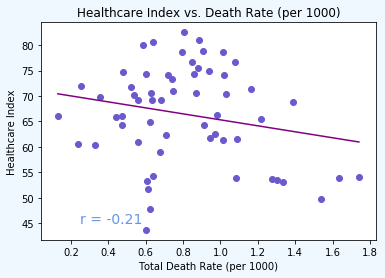

In [92]:
# x = hci.sort_values()
# y = tdr.sort_values()
x1 = tdr
y1 = hci
# plt.plot(x,y, color='wheat', linewidth=4)
plt.scatter(x1, y1, color='slateblue')
plt.title('Healthcare Index vs. Death Rate (per 1000)')
plt.ylabel('Healthcare Index')
plt.xlabel('Total Death Rate (per 1000)')

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x1, y1)
r_string = f'r = {round(rvalue,2)}'
plt.annotate(r_string,(0.25,45), fontsize='14',color='cornflowerblue')

regress_values = np.array(x1) * slope + intercept
plt.plot(x1,regress_values,c="purple")

plt.savefig('Output/hci_vs_death_rate.png')

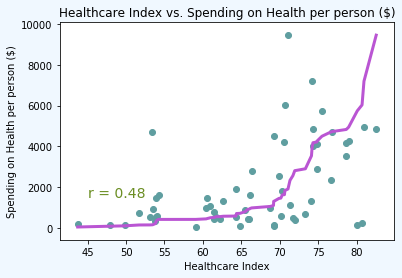

In [50]:
x = hci.sort_values()
y = spend_per_person.sort_values()
x1 = hci
y1 = spend_per_person

plt.plot(x, y, color = 'mediumorchid', linewidth=3)
plt.scatter(x1, (y1), color='cadetblue')
plt.title('Healthcare Index vs. Spending on Health per person ($)')
plt.ylabel('Spending on Health per person ($)')
plt.xlabel('Healthcare Index')

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x1, y1)
r_string = f'r = {round(rvalue,2)}'
plt.annotate(r_string,(45,1500), fontsize='14',color='olivedrab')

plt.savefig('Output/hci_vs_health_care_spend_per_cap.png')

In [64]:
print(most_deaths)

['Bulgaria' 'Serbia' 'Ukraine' 'Lithuania' 'Romania' 'Hungary' 'Belarus'
 'Croatia' 'Estonia' 'Bosnia and Herzegovina']


In [65]:
coordinates = [
    (42.7339, 25.4858),
    (44.0165, 21.0059),
    (48.3794, 31.1656),
    (55.1694, 23.8813),
    (45.9432, 24.9668), 
    (47.1625, 19.5033),
    (53.7098, 27.9534),
    (45.1000, 15.2000),
    (58.5953, 25.0136),
    (43.9159, 17.6791),
]

figure_layout = {
    'width': '600px',
    'height': '500px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout)

In [66]:
# Assign the marker layer to a variable
markers = gmaps.marker_layer(coordinates)
# Add the layer to the map
fig.add_layer(markers)
fig

Figure(layout=FigureLayout(border='1px solid black', height='500px', margin='0 auto 0 auto', padding='1px', wi…

In [58]:
# belarus = clean_df.loc[(clean_df['Country'] == 'Belarus')].sort_values(by='Year')
# neo = belarus.iloc[:,3]
# lri = belarus.iloc[:,4]
# cd = belarus.iloc[:,5]
# crd = belarus.iloc[:,6]
# years = ['2014','2015','2016','2017','2018']

# fig,ax=plt.subplots()
# ax.plot(years, lri, marker="o")
# ax.set_xlabel("Years",fontsize=14)
# ax.set_ylabel("Total Deaths",fontsize=14)
# ax2=ax.twinx()

# ax2.plot(years, neo, marker="o")
# ax2.plot(years, cd, marker="o")
# ax2.plot(years, crd, marker="o")
# plt.show()

In [102]:
# Labels for the sections of our pie chart
labels = grouped_df['Country']

# The values of each section of the pie chart
sizes = grouped_df['Total Death Rate']

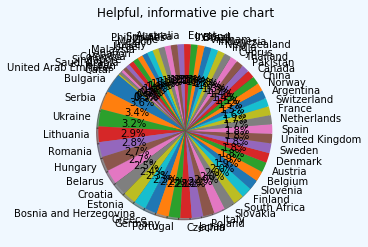

In [110]:
plt.pie(sizes, labels=labels,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Helpful, informative pie chart")
plt.savefig('Output/tdr_pie_chart.png')